In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from collections import Counter

# Exploratory Analysis

In [4]:
# Load the dataset
df = pd.read_csv("data/PSI_Biology_solubility_trainset.csv")

In [5]:
# Display a few rows
df

,sid,solubility,fasta,partition
0,AaCD00331182,1,MTYKDGTYSSDGTYTSPNGLETVGVELTLAADKVSAVNITVHPSNP...,0
1,AaCD00331183,1,MTAMNILVLGSDSRGSSDADVEANTATDQRADTLMLVHVPADRKKT...,1
2,AaCD00331184,1,MKAEGNTAMNILVLGSDSRGSSDADVEANTATDQRADTLMLVHVPA...,1
3,AaCD00331185,1,MQSFNSGSTKIHNAFPEESTRPQKAEGNTAMNILVLGSDSRGSSDA...,1
4,AaCD00331621,1,MNAPVKFEYFKNPKNRELTAVELEAFAKELDQIKQEVLDDIGEKDA...,2
...,...,...,...,...
11221,YsCD00591076,1,MEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARVDRQPY...,0
11222,YsCD00591078,1,MEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARVDRQPY...,0
11223,YsCD00591079,1,MDLFPDEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARV...,0
11224,YsCD00665646,1,MVEQEQEAITFEVVAREWHASNRQWSEAHSARVLKSLEDNLFQAIG...,0


In [46]:
# Calculate ratio of positives in dataset
n_total = len(df.index)
n_soluble = sum(df.solubility == 1)
n_insoluble = n_total - n_soluble
ratio = n_soluble/n_total
ratio

0.6680919294494923

In [47]:
n_insoluble/n_soluble

0.4968

In [8]:
df["fasta_len"] = df.fasta.apply(len)

<AxesSubplot: >

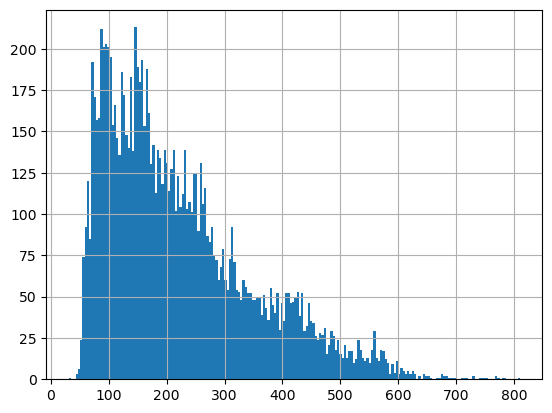

In [9]:
df["fasta_len"].hist(bins=200)

In [10]:
df.describe()

,solubility,partition,fasta_len
count,11226.000000,11226.000000,11226.000000
mean,0.668092,1.769998,222.598878
std,0.470919,1.422884,127.655958
min,0.000000,0.000000,31.000000
25%,0.000000,0.000000,123.000000
50%,1.000000,2.000000,191.000000
75%,1.000000,3.000000,291.750000
max,1.000000,4.000000,810.000000


In [11]:
df[df.solubility == 1].describe()

,solubility,partition,fasta_len
count,7500.0,7500.000000,7500.000000
mean,1.0,1.734800,210.243600
std,0.0,1.428265,125.453439
min,1.0,0.000000,31.000000
25%,1.0,0.000000,112.000000
50%,1.0,2.000000,174.500000
75%,1.0,3.000000,273.000000
max,1.0,4.000000,786.000000


In [12]:
df[df.solubility == 0].describe()

,solubility,partition,fasta_len
count,3726.0,3726.000000,3726.000000
mean,0.0,1.840848,247.468599
std,0.0,1.409519,128.439420
min,0.0,0.000000,49.000000
25%,0.0,1.000000,147.000000
50%,0.0,2.000000,225.000000
75%,0.0,3.000000,321.000000
max,0.0,4.000000,810.000000


<AxesSubplot: xlabel='partition', ylabel='fasta_len'>

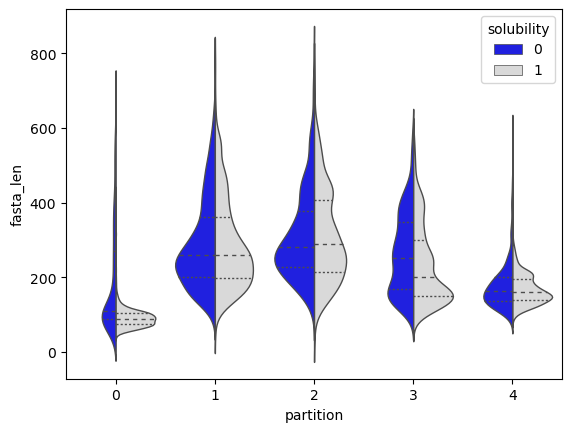

In [13]:
sb.violinplot(data=df, x="partition", y="fasta_len", hue="solubility",
               split=True, inner="quart", linewidth=1,
               palette={0: "b", 1: ".85"})

In [14]:
charCount = pd.DataFrame(list(df.fasta.apply(Counter))).fillna(0)

In [15]:
charFreq = charCount.div(df.fasta_len, axis=0)

In [16]:
df = pd.concat([df, charCount.add_prefix("count_"), charFreq.add_prefix("freq_")], axis=1)

In [17]:
df[df.solubility == 1].describe()

,solubility,partition,fasta_len,count_M,count_T,count_Y,count_K,count_D,count_G,count_S,...,freq_E,freq_V,freq_A,freq_I,freq_H,freq_F,freq_Q,freq_R,freq_W,freq_C
count,7500.0,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.0,1.734800,210.243600,5.227733,11.276800,6.917733,13.019733,12.637600,14.668400,12.407467,...,0.074111,0.070130,0.077071,0.058647,0.023153,0.037039,0.040120,0.057703,0.011440,0.013015
std,0.0,1.428265,125.453439,3.652257,7.930282,5.655513,9.708741,8.909803,11.260166,8.948585,...,0.029048,0.026590,0.033964,0.024599,0.015676,0.017654,0.022522,0.028895,0.010795,0.016770
min,1.0,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,112.000000,3.000000,5.000000,3.000000,6.000000,6.000000,7.000000,6.000000,...,0.054545,0.052632,0.053333,0.041667,0.012195,0.024676,0.024390,0.037594,0.002587,0.000000
50%,1.0,2.000000,174.500000,4.000000,9.000000,5.000000,11.000000,10.000000,11.000000,10.000000,...,0.070796,0.067961,0.073171,0.056911,0.021127,0.036036,0.037073,0.054422,0.009709,0.009259
75%,1.0,3.000000,273.000000,7.000000,15.000000,9.000000,17.000000,17.000000,20.000000,17.000000,...,0.090278,0.085106,0.096491,0.073742,0.031502,0.047619,0.052632,0.074627,0.016949,0.017899
max,1.0,4.000000,786.000000,57.000000,67.000000,50.000000,74.000000,67.000000,107.000000,77.000000,...,0.234043,0.220339,0.323232,0.187500,0.145161,0.123596,0.215768,0.200000,0.074766,0.181818


In [18]:
df[df.solubility == 0].describe()

,solubility,partition,fasta_len,count_M,count_T,count_Y,count_K,count_D,count_G,count_S,...,freq_E,freq_V,freq_A,freq_I,freq_H,freq_F,freq_Q,freq_R,freq_W,freq_C
count,3726.0,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,...,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000
mean,0.0,1.840848,247.468599,6.221954,12.875201,8.554750,13.137144,14.023618,17.077295,15.365808,...,0.064891,0.066941,0.074567,0.057365,0.026323,0.041581,0.041185,0.059507,0.013093,0.017910
std,0.0,1.409519,128.439420,3.821643,8.039917,5.970359,9.158513,8.594113,11.616301,9.492610,...,0.022009,0.021870,0.030442,0.023398,0.014481,0.016592,0.020433,0.023309,0.010037,0.017984
min,0.0,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,147.000000,3.000000,7.000000,4.000000,6.000000,7.000000,8.000000,8.000000,...,0.050000,0.052326,0.053394,0.041192,0.016166,0.030651,0.027596,0.043478,0.005917,0.006711
50%,0.0,2.000000,225.000000,5.000000,11.000000,7.000000,11.000000,12.000000,15.000000,14.000000,...,0.063247,0.065421,0.070762,0.055263,0.024818,0.040170,0.039118,0.057225,0.011719,0.014298
75%,0.0,3.000000,321.000000,8.000000,17.000000,11.000000,18.000000,19.000000,23.000000,21.000000,...,0.077419,0.079491,0.092857,0.071396,0.034351,0.051546,0.051933,0.074074,0.018806,0.023810
max,0.0,4.000000,810.000000,26.000000,58.000000,52.000000,70.000000,70.000000,76.000000,66.000000,...,0.189474,0.178571,0.222707,0.173554,0.120690,0.120690,0.320000,0.189873,0.078652,0.160714


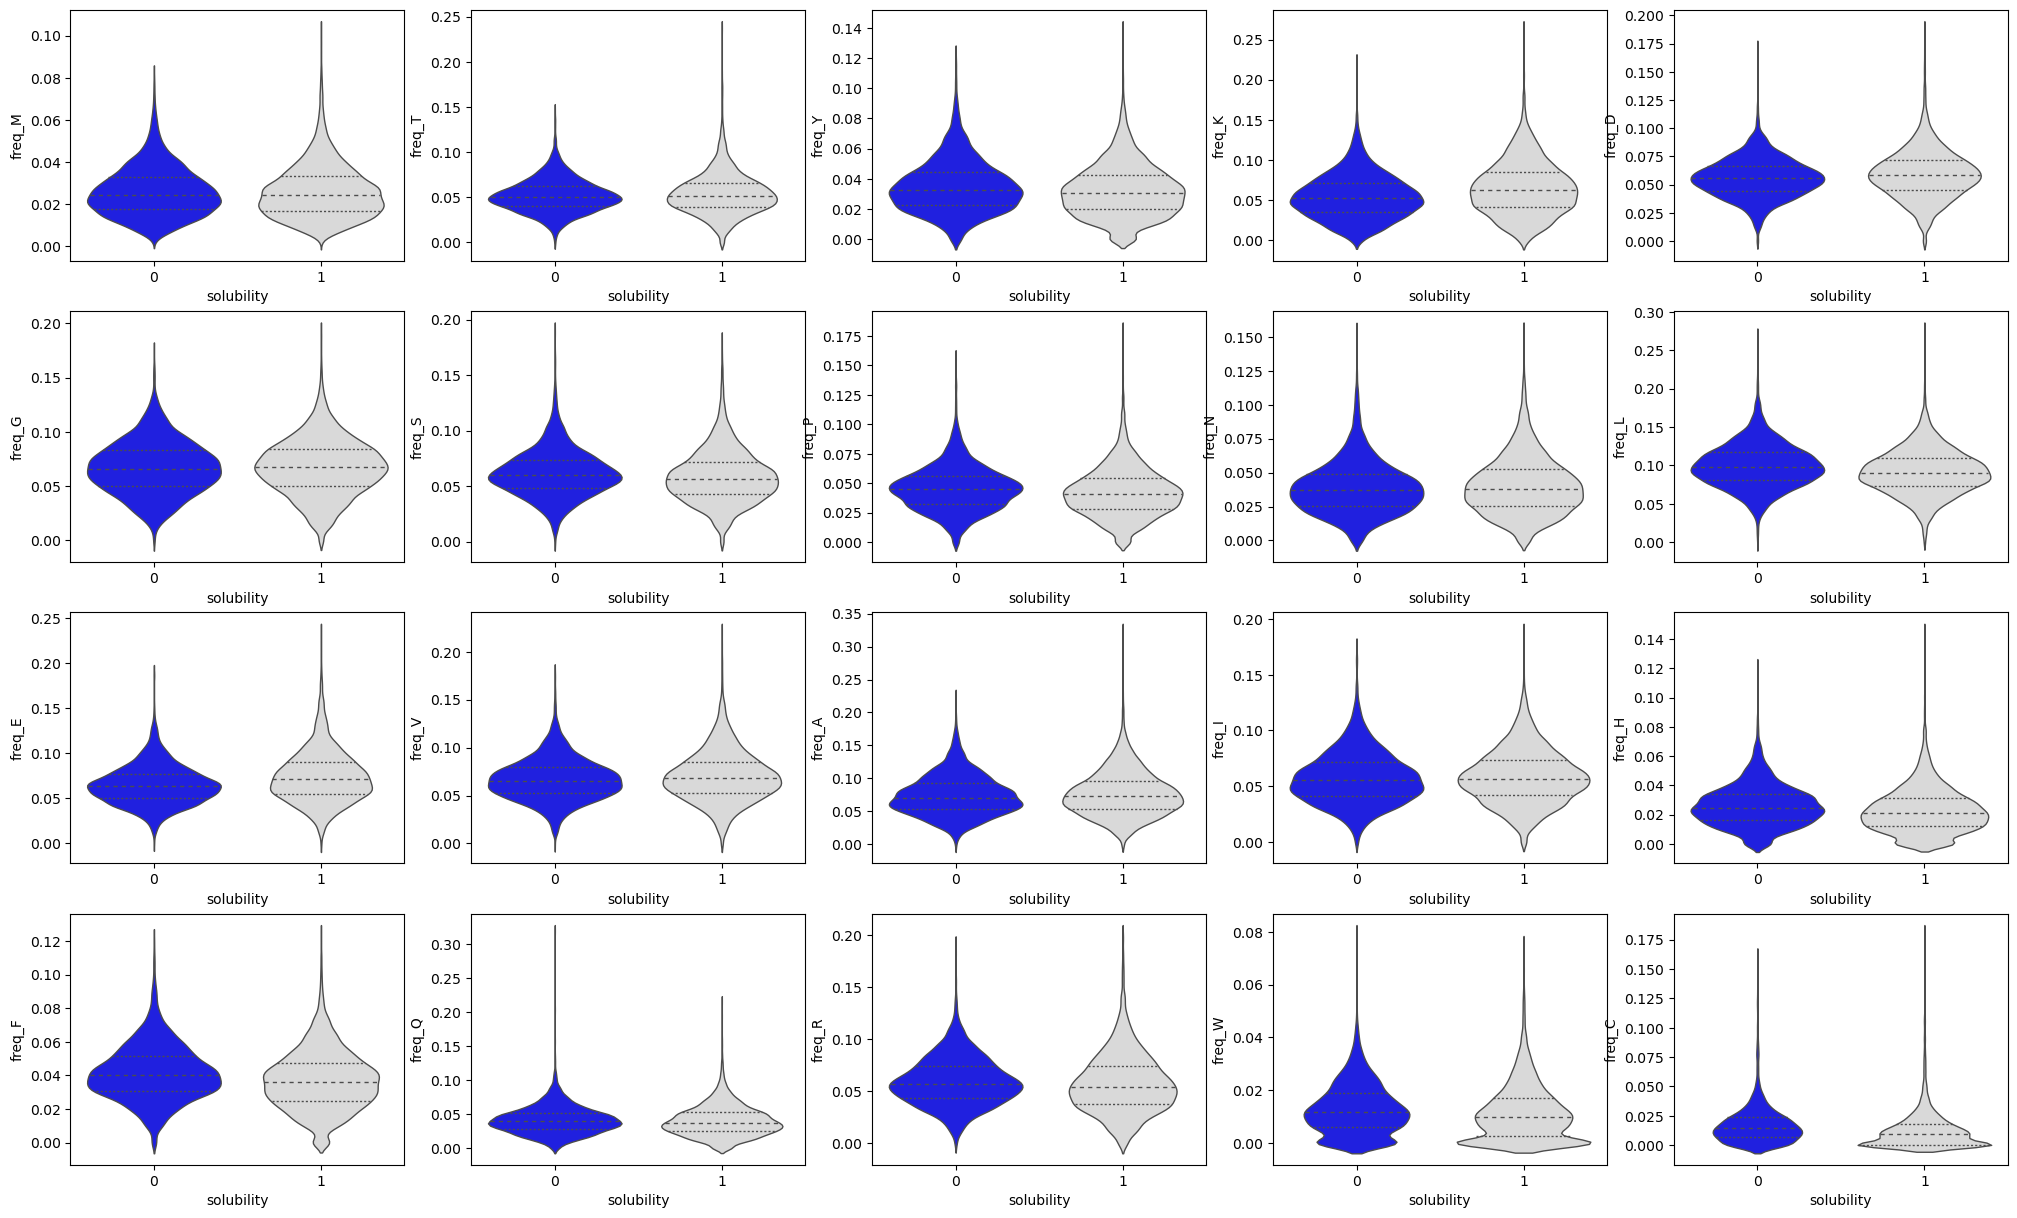

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(25, 15))
for i, col in enumerate(charFreq.add_prefix("freq_").columns):
    sb.violinplot(ax=axes[i//5, i%5], data=df, x="solubility", y=col,
               split=True, inner="quart", linewidth=1,
               palette={0: "b", 1: ".85"})

In [20]:
chars = sorted(charFreq.columns)

In [21]:
len(chars)

20

## Regression Analysis

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
X = df.to_numpy()[:, 5:].astype(float)

In [24]:
y = df.to_numpy()[:, 1].astype(float)

In [25]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

In [26]:
clf = LogisticRegression(max_iter=2000)

In [27]:
clf.fit(X_tr, y_tr)

LogisticRegression(max_iter=2000)

In [28]:
y_pred = clf.predict_proba(X_te)[:, 1]*2 - 1
y_pred

array([0.22912655, 0.56185823, 0.32787574, ..., 0.02131493, 0.66081439,
       0.48011854])

In [31]:
from src.scores import print_scores
import torch

In [32]:
print_scores(torch.tensor(y_pred), torch.tensor(y_te))

Accuracy: 0.700
Precision: 0.870
Recall: 0.731
Pred. STD: 0.082, F1: 0.803
ROC AUC: 0.723


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [43]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [44]:
X_red = pca.transform(X)

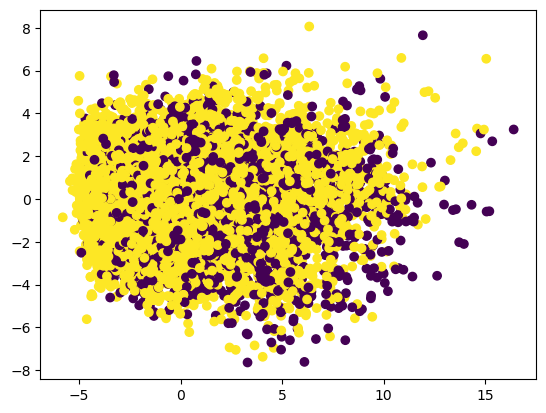

In [45]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=y)